In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf
import matplotlib
import seaborn as sns
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Flatten, Softmax, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
train_ = pd.read_csv('train_final.csv')
test = pd.read_csv('test_28_final.csv')
test_28 = pd.read_csv('test_28_final.csv')

In [ ]:
for col in ['metal_linker', 'organic_linker1', 'organic_linker2']:
    train_[col] = train_[col].astype('category')

## Explore Data and remove outlier, multicollinearity (optional)

In [ ]:
train = train_.copy()

In [ ]:
train.columns

Index(['MOFname', 'volume [A^3]', 'weight [u]', 'density [g/cm^3]',
       'surface_area [m^2/g]', 'gsa', 'vsa', 'smiles', 'MolWt', 'MolLogP',
       'NumValenceElectrons', 'HeavyAtomCount', 'NOCount', 'NumAliphaticRings',
       'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms',
       'NumRotatableBonds', 'void_fraction', 'void_volume [cm^3/g]',
       'functional_groups', 'metal_linker', 'organic_linker1',
       'organic_linker2', 'topology', 'CO2/N2_selectivity',
       'heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]',
       'CO2_working_capacity [mL/g]', 'CID', 'MolecularFormula',
       'MolecularWeight', 'InChI', 'InChIKey', 'IUPACName', 'XLogP',
       'ExactMass', 'MonoisotopicMass', 'TPSA', 'Complexity', 'Charge',
       'HBondDonorCount', 'HBondAcceptorCount', 'RotatableBondCount',
       'IsotopeAtomCount', 'AtomStereoCount', 'DefinedAtomStereoCount',
       'UndefinedAtomStereoCount', 'BondStereoCount', 'DefinedBondStereoCount',
       'UndefinedBondSter

In [ ]:
check_col= ['volume [A^3]', 'weight [u]', 'density [g/cm^3]',
       'surface_area [m^2/g]', 'void_fraction', 'void_volume [cm^3/g]',
       'CO2/N2_selectivity',
       'heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]']


In [ ]:
def point_outlier(d):
    Q1 = d.describe()['25%']
    Q3 = d.describe()['75%']
    IQR = Q3-Q1
    min_ = Q1-1.5*IQR
    max_ = Q3+1.5*IQR
    return min_,max_

In [ ]:
# for col in check_col:
#     min_,max_ = point_outlier(train[col])
#     train.loc[train[col] < min_, col] = np.NAN
#     train.loc[train[col] > max_, col] = np.NAN

In [ ]:
# train.isnull().sum()

MOFname                                             0
volume [A^3]                                     5229
weight [u]                                       5477
density [g/cm^3]                                  958
surface_area [m^2/g]                             1645
gsa                                                 0
vsa                                                 0
smiles                                              0
MolWt                                               0
MolLogP                                             0
NumValenceElectrons                                 0
HeavyAtomCount                                      0
NOCount                                             0
NumAliphaticRings                                   0
NumAromaticRings                                    0
NumHAcceptors                                       0
NumHDonors                                          0
NumHeteroatoms                                      0
NumRotatableBonds           

In [ ]:
# train = train.dropna()

In [ ]:
train.corr()

,volume [A^3],weight [u],density [g/cm^3],surface_area [m^2/g],gsa,vsa,MolWt,MolLogP,NumValenceElectrons,HeavyAtomCount,...,HBondAcceptorCount,RotatableBondCount,IsotopeAtomCount,AtomStereoCount,DefinedAtomStereoCount,UndefinedAtomStereoCount,BondStereoCount,DefinedBondStereoCount,UndefinedBondStereoCount,CovalentUnitCount
volume [A^3],1.000000,0.800379,-0.421185,0.352336,0.210774,0.097570,0.113224,0.059942,0.158851,0.153498,...,0.059199,0.094296,NaN,NaN,NaN,NaN,NaN,NaN,0.004175,0.005675
weight [u],0.800379,1.000000,0.051260,-0.079743,-0.142808,-0.206643,0.237705,0.042523,0.149160,0.142565,...,0.097852,0.096887,NaN,NaN,NaN,NaN,NaN,NaN,0.079670,0.044123
density [g/cm^3],-0.421185,0.051260,1.000000,-0.843761,-0.679402,-0.576315,0.198944,-0.040142,-0.045940,-0.045155,...,0.051619,-0.012281,NaN,NaN,NaN,NaN,NaN,NaN,0.144144,0.070603
surface_area [m^2/g],0.352336,-0.079743,-0.843761,1.000000,0.752550,0.720241,-0.125439,-0.004095,-0.051622,-0.047452,...,-0.053091,-0.037505,NaN,NaN,NaN,NaN,NaN,NaN,-0.061291,-0.034502
gsa,0.210774,-0.142808,-0.679402,0.752550,1.000000,0.742375,-0.129158,-0.012721,-0.073965,-0.068879,...,-0.057297,-0.048503,NaN,NaN,NaN,NaN,NaN,NaN,-0.057963,-0.033014
vsa,0.097570,-0.206643,-0.576315,0.720241,0.742375,1.000000,-0.014983,-0.053166,-0.150393,-0.139095,...,-0.037665,-0.076062,NaN,NaN,NaN,NaN,NaN,NaN,0.041223,0.006181
MolWt,0.113224,0.237705,0.198944,-0.125439,-0.129158,-0.014983,1.000000,0.364386,0.649854,0.634704,...,0.222351,0.374896,NaN,NaN,NaN,NaN,NaN,NaN,0.199175,0.095993
MolLogP,0.059942,0.042523,-0.040142,-0.004095,-0.012721,-0.053166,0.364386,1.000000,0.265859,0.285896,...,-0.511807,0.229887,NaN,NaN,NaN,NaN,NaN,NaN,0.052309,-0.099391
NumValenceElectrons,0.158851,0.149160,-0.045940,-0.051622,-0.073965,-0.150393,0.649854,0.265859,1.000000,0.983306,...,0.482098,0.510517,NaN,NaN,NaN,NaN,NaN,NaN,-0.018629,0.052256
HeavyAtomCount,0.153498,0.142565,-0.045155,-0.047452,-0.068879,-0.139095,0.634704,0.285896,0.983306,1.000000,...,0.461732,0.462964,NaN,NaN,NaN,NaN,NaN,NaN,-0.021665,0.044658


In [ ]:
#drop weight เพราะมี คสพกับตัวแปรอื่นคือ volume สูง
#train = train.drop(columns = 'weight [u]')

## Train

In [ ]:
train_x = train.drop(columns=['gsa','vsa','CO2_working_capacity [mL/g]','functional_groups','MOFname','smiles','MolecularFormula','CID','InChI','InChIKey','IUPACName'])
train_y = train['CO2_working_capacity [mL/g]']

In [ ]:
train_x = pd.get_dummies(train_x)
train_x_column = train_x.columns

In [ ]:
train_x.columns

Index(['volume [A^3]', 'weight [u]', 'density [g/cm^3]',
       'surface_area [m^2/g]', 'MolWt', 'MolLogP', 'NumValenceElectrons',
       'HeavyAtomCount', 'NOCount', 'NumAliphaticRings',
       ...
       'topology_bcu', 'topology_etb', 'topology_fof', 'topology_nbo',
       'topology_pcu', 'topology_pts', 'topology_rht', 'topology_sra',
       'topology_tbo', 'topology_the'],
      dtype='object', length=169)

## DNN method

### train set

In [ ]:

from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.utils import class_weight 
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping,LearningRateScheduler

In [ ]:
X, Xval, y, yval = train_test_split(train_x,train_y, test_size =0.1)
sc = StandardScaler()
X = sc.fit_transform(X) #เราควรยึด distribution ของ traing set เป็นหลัก ถ้าใช้ distributionอื่นได้การฟิตด้วย ก้จะเกิดbiasได้

Xval = sc.transform (Xval)

In [ ]:
initial_learning_rate = 0.01
epochs = 300
decay = initial_learning_rate / epochs
def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

In [ ]:
X.shape

(52110, 169)

In [ ]:
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Flatten, Softmax, Dropout

model = models.Sequential()
model.add(Dense(128, activation="relu", input_shape=X.shape[1:]))
model.add(Dropout(0.04))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.04))
model.add(Dense(1))


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("best_weight_.hdf5", save_weights_only=True, monitor='val_loss', mode='min', save_best_only=True)
# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),loss="mean_absolute_error")
# train the model
#history = model.fit(X, y, validation_data=(Xval, yval), epochs=400, batch_size=256,callbacks=[model_checkpoint_callback])


In [ ]:
#history = model.fit(X, y, validation_data=(Xval, yval), epochs=300, batch_size=256,callbacks=[model_checkpoint_callback,LearningRateScheduler(lr_time_based_decay, verbose=1)])

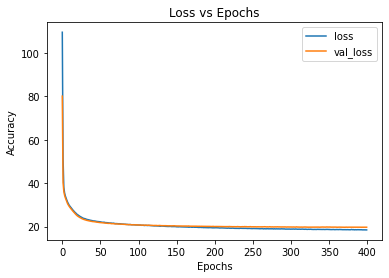

In [ ]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Loss vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model.load_weights('best_weight_.hdf5')

### Test set

In [ ]:
for col in ['metal_linker', 'organic_linker1', 'organic_linker2']:
    test[col] = test[col].astype('category')
#test= test.drop(columns=['MOFname','functional_groups','smiles','MolecularFormula','InChI','InChIKey','IUPACName'])
test= test.drop(columns=['functional_groups','MOFname','smiles','MolecularFormula','CID','InChI','InChIKey','IUPACName'])

In [ ]:
test = pd.get_dummies(test)
test_column = test.columns

In [ ]:
l = []
for col in train_x_column:
    if col not in test_column:
        l.append(col)
listofzeros = [0] *17000
for col in l:
    test[col]= listofzeros
test.shape
test = test.reindex(columns = train_x_column)

In [ ]:
test = sc.transform (test)

In [ ]:
#สำหรับ โมเดลเดียว
pred = model.predict(test)

## Save to submission

In [ ]:
#สำหรับการ weightหลายโมเดล
df = pd.DataFrame()
df['id'] = test_28['MOFname']
df['pred1'] = pred1
df['pred2'] = pred2
df['CO2_working_capacity [mL/g]'] = pred1*0.9+pred2*0.1

In [ ]:
df=df[['id','CO2_working_capacity [mL/g]']]

In [ ]:
df = pd.DataFrame()
df['id'] = test_28['MOFname']
df['CO2_working_capacity [mL/g]'] = pred
df

,id,CO2_working_capacity [mL/g]
0,mof_unit_68614,189.582077
1,mof_unit_68615,62.033276
2,mof_unit_68616,75.945396
3,mof_unit_68617,57.636391
4,mof_unit_68618,59.414783
...,...,...
16995,mof_unit_85609,-5.468848
16996,mof_unit_85610,1.126652
16997,mof_unit_85611,0.693720
16998,mof_unit_85612,-1.035079


In [ ]:
df['id'] = df['id'].apply(lambda x:x.replace("mof_unit_",""))

In [ ]:
df.to_csv('submission.csv',index=False)

In [ ]:
df

,id,CO2_working_capacity [mL/g]
0,68614,190.731827
1,68615,59.756840
2,68616,73.331406
3,68617,58.991524
4,68618,58.016315
...,...,...
16995,85609,-5.380282
16996,85610,1.424234
16997,85611,1.100455
16998,85612,-0.930252


# Improve model : HyperBand

In [ ]:
! pip install keras-tuner 
import kerastuner as kt

     |████████████████████████████████| 97 kB 12.3 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [ ]:
def build_model(hp):
    '''
    Builds model and sets up hyperparameter space to search.
    
    Parameters
    ----------
    hp : HyperParameter object
        Configures hyperparameters to tune.
        
    Returns
    -------
    model : keras model
        Compiled model with hyperparameters to tune.
    '''
    # build the model
    model = models.Sequential()
    Flatten(input_shape=(X.shape[1:],))
    for i in range(hp.Int("num_layers", 1, 5)):
      model.add(Dense(units=hp.Int("units_" + str(i), min_value=16, max_value=100, step=1), activation=hp.Choice("activation", values=['relu', 'elu', 'selu'])))
      model.add(Dropout(hp.Float("dropout_" + str(i), 0, 0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))

    #  
    # compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Float("lr", 1e-4, 1e-2, sampling ='log')),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# Instantiate the tuner
tuner = kt.Hyperband(build_model, # A HyperModel - takes a hyperparameter and return model instance
                     objective="val_accuracy", # metrics to be optimized
                     max_epochs=10, # the maximum number of epochs to train one model
                     factor=3, # the reduction factor for the number of epoch
                     hyperband_iterations=5, # the number of times to iterate over the full Hyperband algorithm
                     directory="kt_dir", # saves logs and checkpoints for each trial run during the hyperparameter search
                     project_name="kt_hyperband",) # differentiate with other runs and is a subdirectory under directory

INFO:tensorflow:Reloading Oracle from existing project kt_dir/kt_hyperband/oracle.json
INFO:tensorflow:Reloading Tuner from kt_dir/kt_hyperband/tuner0.json


In [ ]:
tuner.search_space_summary() #ดูว่า search hyperparameter space ตัวไหนยังไงบ้าง

Search space summary
Default search space size: 13
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 100, 'step': 1, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'elu', 'selu'], 'ordered': False}
dropout_0 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 100, 'step': 1, 'sampling': None}
dropout_1 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 100, 'step': 1, 'sampling': None}
dropout_2 (Float)
{'

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X,y, epochs=5, validation_split=0.4, callbacks=[stop_early], verbose=2)

INFO:tensorflow:Oracle triggered exit


In [ ]:
best_hp=tuner.get_best_hyperparameters()[0]
print(best_hp.get('units_0'))
print(best_hp.get('lr'))
print(best_hp.get('num_layers'))
print(best_hp.get('activation'))
print(best_hp.get('dropout_0'))

47
0.0020187460474604367
3
relu
0.2


In [ ]:
model = tuner.hypermodel.build(best_hp)
history = model.fit(X, y, validation_split=0.4, epochs=300, batch_size=256,callbacks=[model_checkpoint_callback])
model.summary()

Epoch 1/300
123/123 [==============================] - 6s 37ms/step - loss: -26807.1165 - accuracy: 0.0000e+00 - val_loss: -964604.9375 - val_accuracy: 0.0000e+00
Epoch 2/300
123/123 [==============================] - 0s 3ms/step - loss: -4271321.7208 - accuracy: 0.0000e+00 - val_loss: -32533842.0000 - val_accuracy: 0.0000e+00
Epoch 3/300
123/123 [==============================] - 0s 3ms/step - loss: -63016379.1935 - accuracy: 0.0000e+00 - val_loss: -220245632.0000 - val_accuracy: 0.0000e+00
Epoch 4/300
123/123 [==============================] - 0s 3ms/step - loss: -332436929.1613 - accuracy: 0.0000e+00 - val_loss: -803517504.0000 - val_accuracy: 0.0000e+00
Epoch 5/300
123/123 [==============================] - 0s 3ms/step - loss: -1072054282.3226 - accuracy: 0.0000e+00 - val_loss: -2111350784.0000 - val_accuracy: 0.0000e+00
Epoch 6/300
123/123 [==============================] - 0s 4ms/step - loss: -2629827143.2258 - accuracy: 0.0000e+00 - val_loss: -4528471040.0000 - val_accuracy: 0.0

## Ensemble model

In [ ]:
# submission7,8,14
model_7 = models.Sequential()
model_7.add(Dense(128, activation="relu", input_shape=X.shape[1:]))
model_7.add(Dropout(0.04))
model_7.add(Dense(128, activation="relu"))
model_7.add(Dropout(0.04))
model_7.add(Dense(1))

model_8 = models.Sequential()
model_8.add(Dense(48, activation="relu", input_shape=X.shape[1:]))
model_8.add(Dropout(0.04))
model_8.add(Dense(48, activation="relu"))
model_8.add(Dropout(0.04))
model_8.add(Dense(1))

model_14 = models.Sequential()
model_14.add(Dense(47, activation="relu", input_shape=X.shape[1:]))
model_14.add(Dropout(0.2))
model_14.add(Dense(28, activation="relu"))
model_14.add(Dropout(0.1))
model_14.add(Dense(33, activation="relu"))
model_14.add(Dropout(0.1))
model_14.add(Dense(1))

model_5 = models.Sequential()
model_5.add(Dense(30, activation="relu", input_shape=X.shape[1:]))
model_5.add(Dense(30, activation="relu"))
model_5.add(Dense(1))

In [ ]:
model_7.load_weights('best_weight_7_2.hdf5')
model_8.load_weights('best_weight_8_2.hdf5')
model_14.load_weights('best_weight_14_2.hdf5')
model_5.load_weights('best_weight_5_2.hdf5')

In [ ]:
pred_7 = model_7.predict(test)
pred_8 = model_8.predict(test)
pred_14 = model_14.predict(test)
pred_5  = model_5.predict(test)

In [ ]:
df = pd.DataFrame()
df['id'] = test_28['MOFname']
df['CO2_working_capacity [mL/g]'] = pred_7*0.7+pred_8*0.2+pred_14*0.1

# Functional API

In [ ]:
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import concatenate
from tensorflow.keras.optimizers import Adam

In [ ]:
def create_model7():
    model = Sequential()
    model.add(Dense(128, activation="relu", input_shape=X.shape[1:]))
    model.add(Dropout(0.04))
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.04))
    model.add(Dense(1))
    return model

In [ ]:
def create_model8():
    model = Sequential()
    model.add(Dense(48, activation="relu", input_shape=X.shape[1:]))
    model.add(Dropout(0.04))
    model.add(Dense(48, activation="relu"))
    model.add(Dropout(0.04))
    model.add(Dense(1))
    return model

In [ ]:
model_7 = create_model7()
model_8 = create_model8()

In [ ]:
combinedInput = concatenate([model_7.output,model_8.output])
# our final FC layer head will have two dense layers, the final one
# being our regression head
x = Dense(4, activation="relu")(combinedInput)
x = Dense(1, activation="relu")(x)
# our final model will accept categorical/numerical data on the MLP
# input and images on the CNN input, outputting a single value (the
# predicted price of the house)
model = Model(inputs=[model_7.input,model_8.input], outputs=x)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
dense_3_input (InputLayer)      [(None, 169)]        0                                            
__________________________________________________________________________________________________
dense_6_input (InputLayer)      [(None, 169)]        0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 128)          21760       dense_3_input[0][0]              
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 48)           8160        dense_6_input[0][0]              
______________________________________________________________________________________________

In [ ]:
opt = Adam(lr=1e-1, decay=1e-1 / 200)
model.compile(loss="mean_absolute_error", optimizer=opt)
# train the model
print("[INFO] training model...")
history = model.fit(
		x=[X,X], y=y,
		validation_data=([Xval,Xval], yval),
		epochs=200, batch_size=32,callbacks=[model_checkpoint_callback])

[INFO] training model...
Epoch 1/200
1629/1629 [==============================] - 5s 2ms/step - loss: 40.8011 - val_loss: 31.0489
Epoch 2/200
1629/1629 [==============================] - 4s 2ms/step - loss: 28.1646 - val_loss: 23.6394
Epoch 3/200
1629/1629 [==============================] - 4s 2ms/step - loss: 25.6851 - val_loss: 23.7372
Epoch 4/200
1629/1629 [==============================] - 4s 2ms/step - loss: 24.3367 - val_loss: 22.4307
Epoch 5/200
1629/1629 [==============================] - 4s 2ms/step - loss: 23.2908 - val_loss: 21.8750
Epoch 6/200
1629/1629 [==============================] - 4s 2ms/step - loss: 22.8835 - val_loss: 21.4120
Epoch 7/200
1629/1629 [==============================] - 4s 2ms/step - loss: 22.2961 - val_loss: 21.7109
Epoch 8/200
1629/1629 [==============================] - 4s 2ms/step - loss: 22.1605 - val_loss: 22.4642
Epoch 9/200
1629/1629 [==============================] - 3s 2ms/step - loss: 21.8572 - val_loss: 20.9689
Epoch 10/200
1629/1629 [======

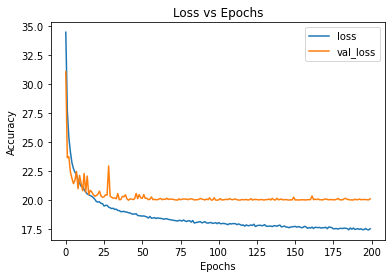

In [ ]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Loss vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# XG Boost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import fbeta_score, make_scorer
from xgboost.sklearn import XGBRegressor

parameters = {'objective':['reg:squarederror'],
              'booster':['gbtree','gblinear'],
              'learning_rate': [0.1], 
              'max_depth': [7,10,15,20],
              'min_child_weight': [10,15,20,25],
              'colsample_bytree': [0.8, 0.9, 1],
              'n_estimators': [300,400,500,600],
              "reg_alpha"   : [0.5,0.2,1],
              "reg_lambda"  : [2,3,5],
              "gamma"       : [1,2,3]}

xgb_model = XGBRegressor(random_state=30)

grid_obj_xgb = RandomizedSearchCV(xgb_model,parameters, cv=5,n_iter=15,scoring='neg_mean_absolute_error',verbose=5,n_jobs=12)
grid_obj_xgb.fit(df_train, y_train,verbose = 1)

y_pred_train = grid_obj_xgb.predict(df_train)
y_pred_test = grid_obj_xgb.predict(df_test)

err_xgb_train=mean_absolute_error(y_train, y_pred_train, multioutput='raw_values')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2f689462-c414-443c-b5c3-3cbe297a247a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>